In [26]:
!pip install tf-nightly

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\kmj\\pycharmprojects\\pythonproject\\venv\\lib\\site-packages\\~5py\\defs.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\kmj\pycharmprojects\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from glob import glob

In [2]:
path = "./kf"
for path, dirs, files in os.walk(path):
    for i in files:
        if i.endswith(".jpg"):
            pass
        else:
            os.remove(os.path.join(path,i))

In [2]:
image_count = len(list(glob('./kfood/*/*.jpg')))
print(image_count)

68035


In [3]:
path = "./kfood"
lis = []
for data_dir, dirs, files in os.walk(path):
    for i in files:
        lis.append(i)
print(len(lis))

68035


In [65]:
# import glob 
# import os.path

# files = glob.glob("*.mp3") 
# for x in files: 
#     if not os.path.isdir(x): 
#         filename = os.path.splitext(x) 
#         try: 
#             os.rename(x,filename[0] + '.mp4') 
#         except: 
#             pass

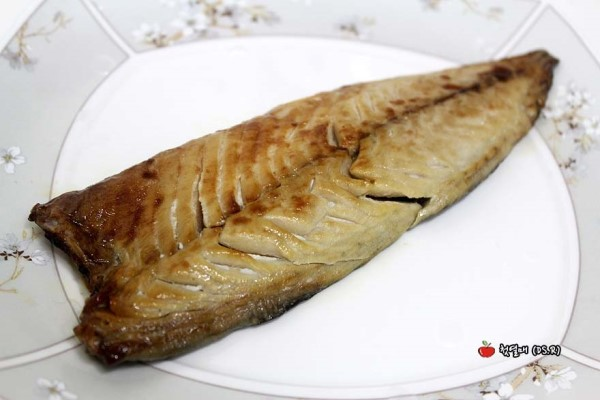

In [5]:
fish = list(glob('./kf/고등어구이/*'))
PIL.Image.open(str(fish[1]))

In [4]:
batch_size = 680
img_height = 180
img_width = 180

In [5]:
path = "./kfood"
data_dir = str(path)

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 68035 files belonging to 69 classes.
Using 54428 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 68035 files belonging to 69 classes.
Using 13607 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['간장게장', '갈비구이', '갈비찜', '갈비탕', '갈치구이', '갈치조림', '감자전', '감자조림', '감자채볶음', '감자탕', '갓김치', '건새우볶음', '경단', '계란국', '계란말이', '계란찜', '계란후라이', '고등어구이', '고등어조림', '고사리나물', '고추장진미채볶음', '고추튀김', '곱창구이', '곱창전골', '과메기', '김밥', '김치볶음밥', '김치전', '김치찌개', '김치찜', '깍두기', '깻잎장아찌', '꼬막찜', '꽁치조림', '꽈리고추무침', '꿀떡', '나박김치', '누룽지', '닭갈비', '닭계장', '닭볶음탕', '더덕구이', '도라지무침', '도토리묵', '동그랑땡', '동태찌개', '된장찌개', '두부김치', '두부조림', '땅콩조림', '떡갈비', '떡꼬치', '떡만두국', '떡볶이', '라면', '라볶이', '막국수', '만두', '매운탕', '멍게', '메추리알장조림', '멸치볶음', '무국', '무생채', '물냉면', '물회', '미역국', '미역줄기볶음', '후라이드치킨']
69


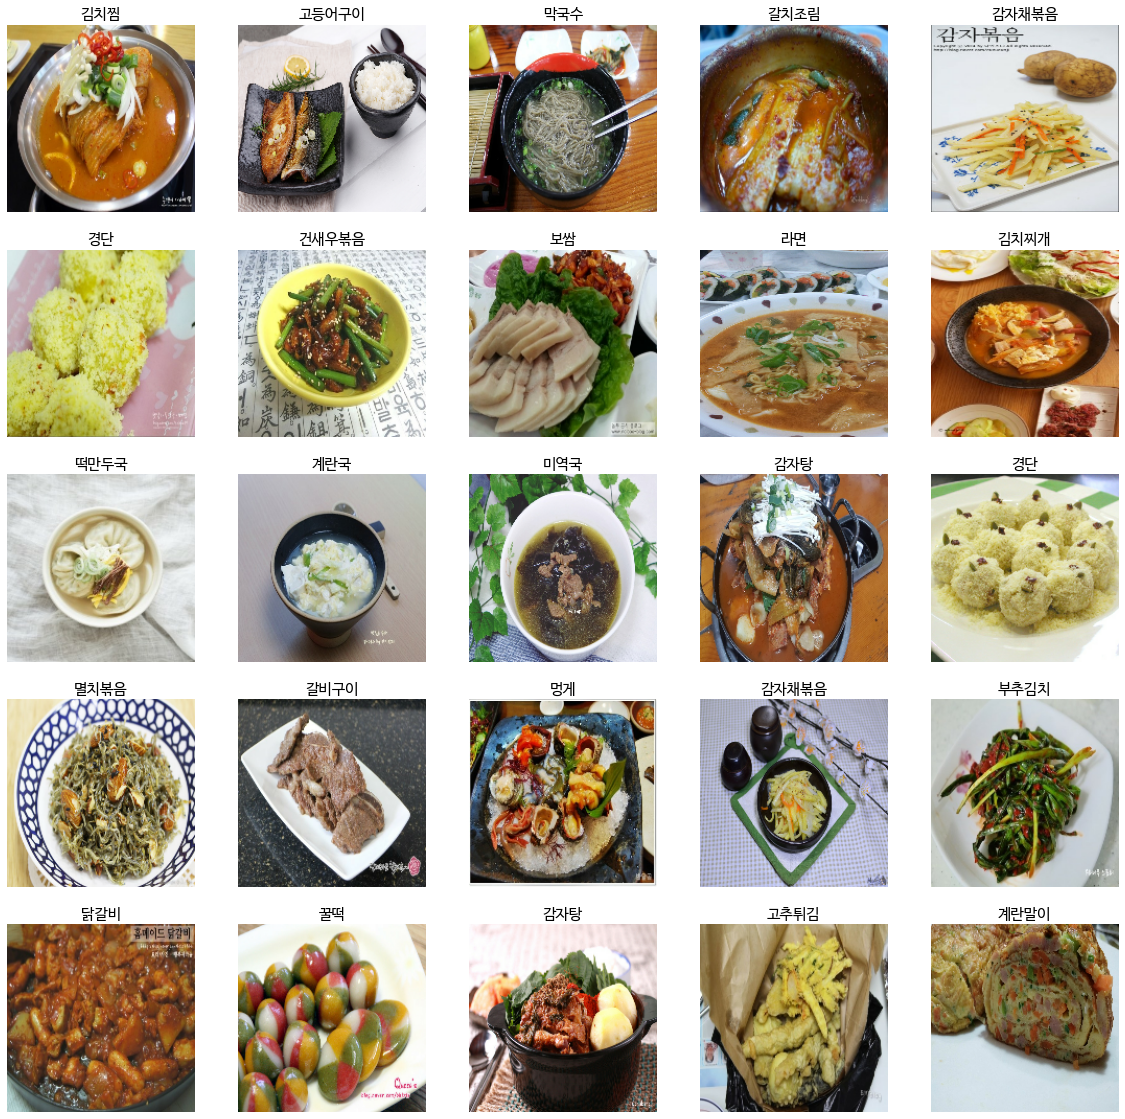

In [57]:
import matplotlib.font_manager as fm

path = "./NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname=path, size=15)

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]], fontproperties=fontprop)
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(680, 180, 180, 3)
(680,)


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch = list(normalized_ds)[0][0]
# labels_batch = list(normalized_ds)[0][1]
# first_image = image_batch[15]
# # Notice the pixels values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image)) 

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[15]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [13]:
num_classes = 69

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
81/81 [==============================] - 447s 5s/step - loss: 4.1650 - accuracy: 0.0288 - val_loss: 3.9819 - val_accuracy: 0.0409
Epoch 2/10
81/81 [==============================] - 442s 5s/step - loss: 3.7291 - accuracy: 0.0712 - val_loss: 3.5352 - val_accuracy: 0.0944
Epoch 3/10
81/81 [==============================] - 443s 5s/step - loss: 3.4168 - accuracy: 0.1181 - val_loss: 3.3584 - val_accuracy: 0.1224
Epoch 4/10
81/81 [==============================] - 443s 5s/step - loss: 3.2293 - accuracy: 0.1555 - val_loss: 3.1933 - val_accuracy: 0.1612
Epoch 5/10
81/81 [==============================] - 442s 5s/step - loss: 3.0770 - accuracy: 0.1883 - val_loss: 3.1209 - val_accuracy: 0.1731
Epoch 6/10
81/81 [==============================] - 443s 5s/step - loss: 2.9507 - accuracy: 0.2177 - val_loss: 3.0195 - val_accuracy: 0.1970
Epoch 7/10
81/81 [==============================] - 442s 5s/step - loss: 2.8083 - accuracy: 0.2506 - val_loss: 2.9430 - val_accuracy: 0.2214
Epoch 8/10
81

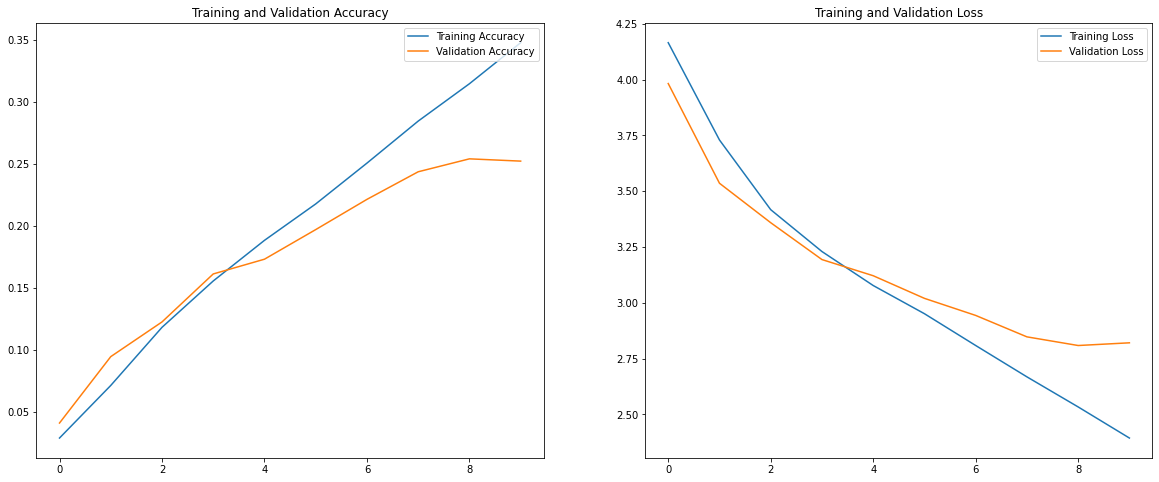

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

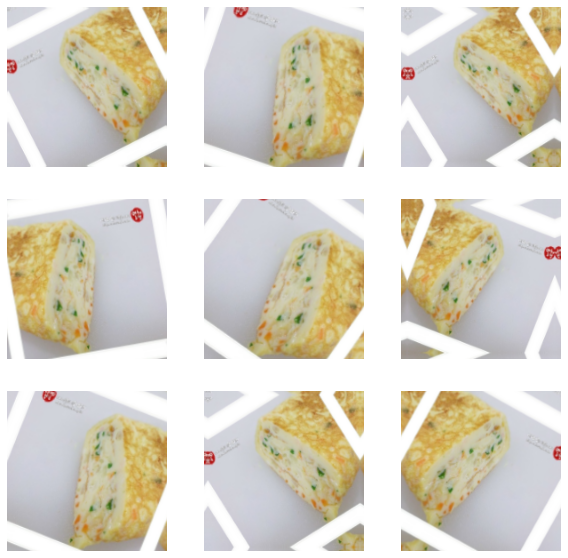

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [19]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [22]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
81/81 [==============================] - 511s 6s/step - loss: 3.9013 - accuracy: 0.0554 - val_loss: 3.6137 - val_accuracy: 0.0914
Epoch 2/30
81/81 [==============================] - 509s 6s/step - loss: 3.3779 - accuracy: 0.1327 - val_loss: 3.2845 - val_accuracy: 0.1521
Epoch 3/30
81/81 [==============================] - 510s 6s/step - loss: 3.1598 - accuracy: 0.1776 - val_loss: 3.3019 - val_accuracy: 0.1620
Epoch 4/30
81/81 [==============================] - 510s 6s/step - loss: 3.0052 - accuracy: 0.2101 - val_loss: 3.2543 - val_accuracy: 0.1781
Epoch 5/30
81/81 [==============================] - 508s 6s/step - loss: 2.8865 - accuracy: 0.2399 - val_loss: 3.1165 - val_accuracy: 0.2127
Epoch 6/30
81/81 [==============================] - 512s 6s/step - loss: 2.7765 - accuracy: 0.2657 - val_loss: 3.0056 - val_accuracy: 0.2322
Epoch 7/30
81/81 [==============================] - 510s 6s/step - loss: 2.6923 - accuracy: 0.2855 - val_loss: 3.0317 - val_accuracy: 0.2334
Epoch 8/30
81

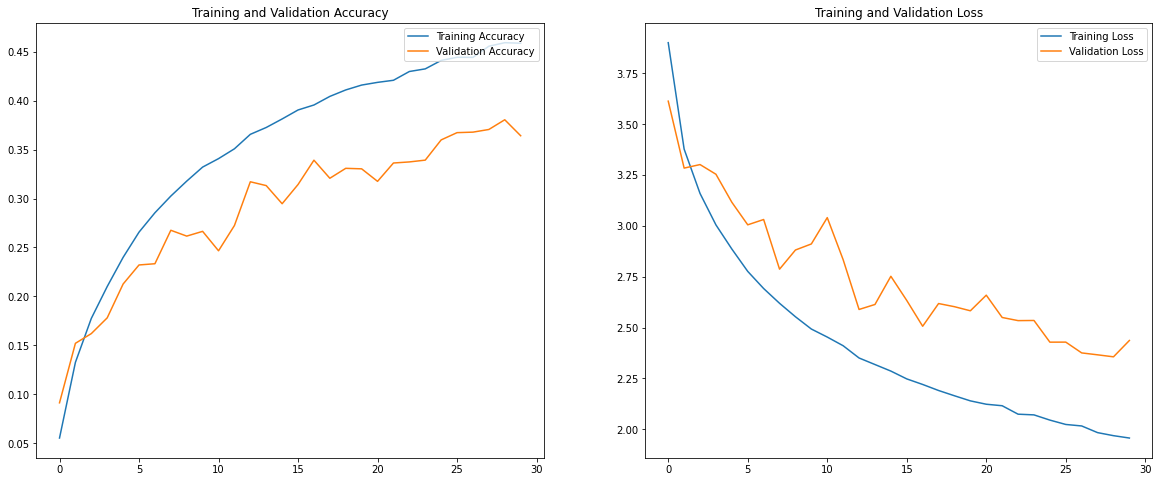

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [33]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
81/81 [==============================] - 546s 7s/step - loss: 1.6713 - accuracy: 0.5279 - val_loss: 2.0538 - val_accuracy: 0.4378
Epoch 2/50
81/81 [==============================] - 549s 7s/step - loss: 1.6445 - accuracy: 0.5332 - val_loss: 2.2948 - val_accuracy: 0.4010
Epoch 3/50
81/81 [==============================] - 553s 7s/step - loss: 1.6336 - accuracy: 0.5359 - val_loss: 1.9452 - val_accuracy: 0.4637
Epoch 4/50
81/81 [==============================] - 561s 7s/step - loss: 1.6248 - accuracy: 0.5398 - val_loss: 2.0574 - val_accuracy: 0.4382
Epoch 5/50
81/81 [==============================] - 553s 7s/step - loss: 1.5933 - accuracy: 0.5468 - val_loss: 2.0959 - val_accuracy: 0.4369
Epoch 6/50
81/81 [==============================] - 557s 7s/step - loss: 1.5886 - accuracy: 0.5465 - val_loss: 2.1748 - val_accuracy: 0.4260
Epoch 7/50
81/81 [==============================] - 560s 7s/step - loss: 1.5622 - accuracy: 0.5553 - val_loss: 1.9423 - val_accuracy: 0.4629
Epoch 8/50
81

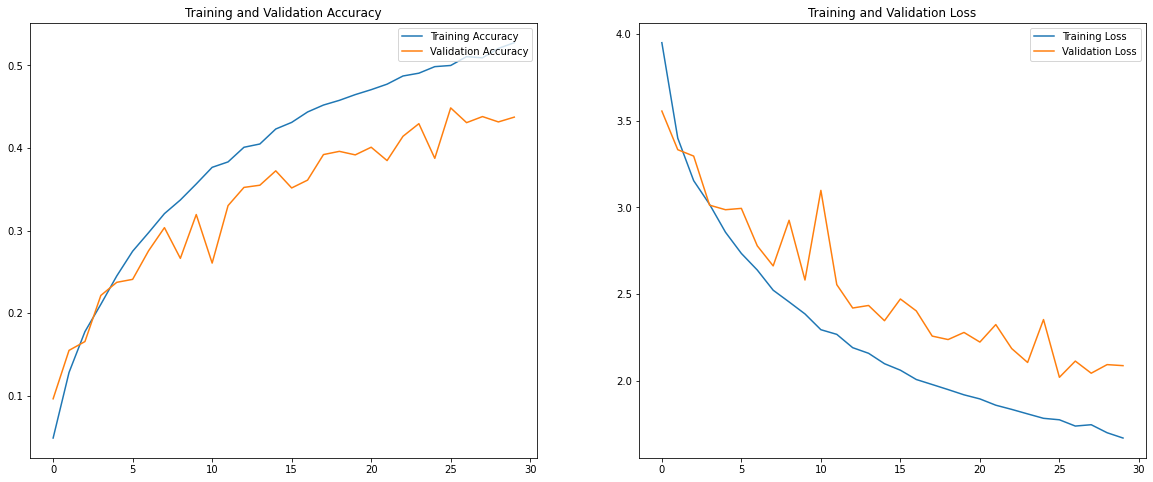

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
new_url = "https://recipe1.ezmember.co.kr/cache/recipe/2018/02/10/a9e93c1f2dc682239fc7e156c121fb6a1.jpg"
path = "./kft/test_image.jpg"
import urllib.request as req
req.urlretrieve(new_url, path)

img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "예측값: {}(정확도 {:.2f}%)"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

예측값: 갈비찜(정확도 78.61%)


In [36]:
from tensorflow.keras.models import load_model
from tensorflow import keras 
import urllib.request as req

model.save("kf_model.h5")
model = keras.models.load_model('./kf_model.h5')

# new_url = "https://recipe1.ezmember.co.kr/cache/recipe/2018/02/10/a9e93c1f2dc682239fc7e156c121fb6a1.jpg"
# path = "./kft/test_image.jpg"
# req.urlretrieve(new_url, path)
path = "./kfood/후라이드치킨/Img_028_0000.jpg"

img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "예측값: {}(정확도 {:.2f}%)"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

예측값: 후라이드치킨(정확도 94.91%)
